In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [2]:
df = pd.read_csv("NFLX.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [3]:
viz = df.copy()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [4]:
df.shape

(1009, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


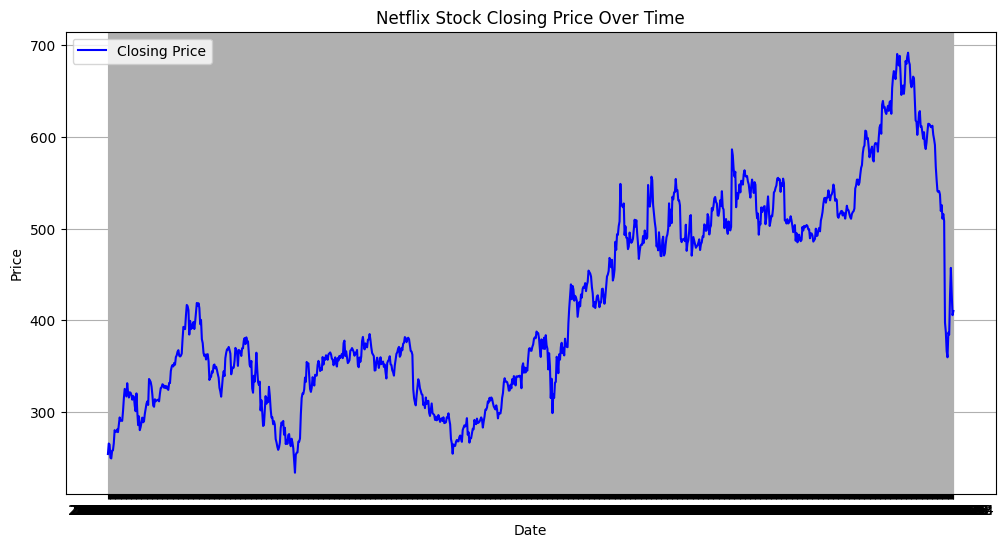

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Netflix Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Basic Statistics of Closing Price:
count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64


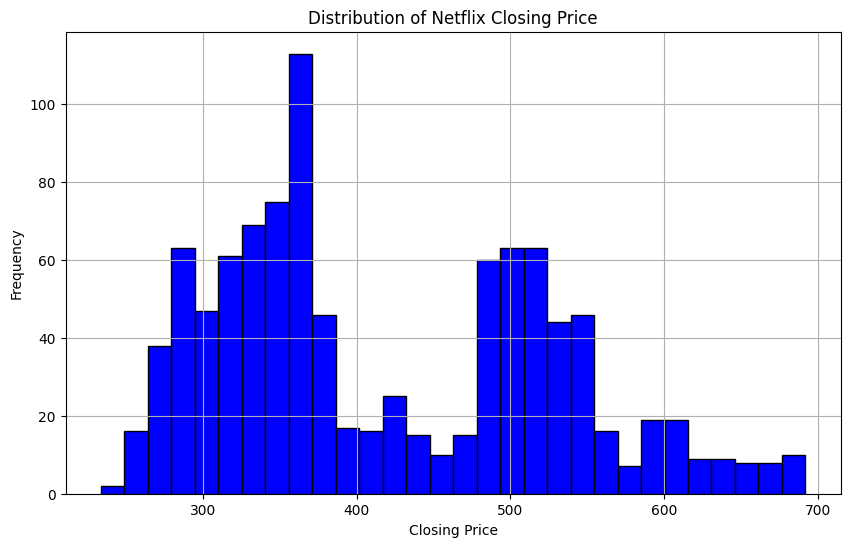

In [8]:

closing_price_stats = df['Close'].describe()


print("Basic Statistics of Closing Price:")
print(closing_price_stats)


plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Netflix Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

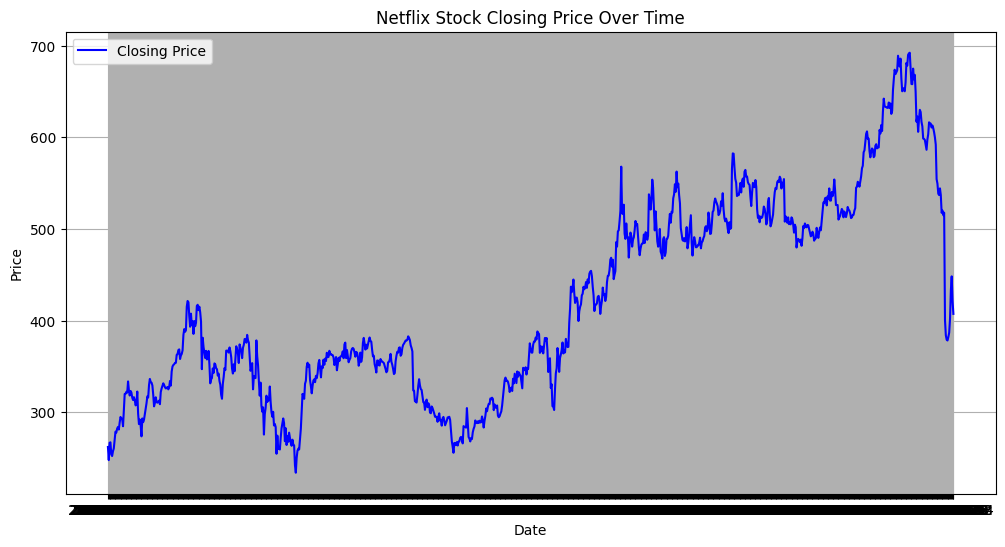

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Closing Price', color='blue')
plt.title('Netflix Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Basic Statistics of Opening Price:
count    1009.000000
mean      419.059673
std       108.537532
min       233.919998
25%       331.489990
50%       377.769989
75%       509.130005
max       692.349976
Name: Open, dtype: float64


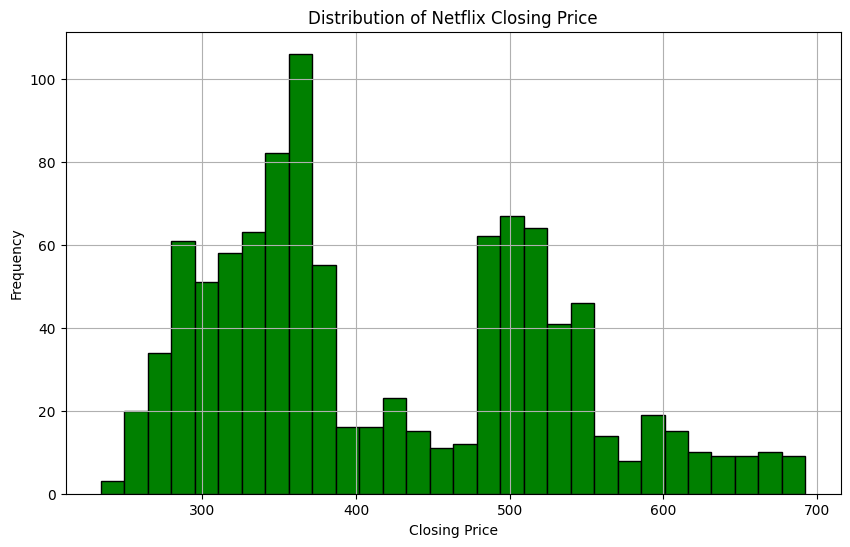

In [10]:
opening_price_stats = df['Open'].describe()


print("Basic Statistics of Opening Price:")
print(opening_price_stats)


plt.figure(figsize=(10, 6))
plt.hist(df['Open'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Netflix Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Basic Statistics of Closing Price:
count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

Basic Statistics of Opening Price:
count    1009.000000
mean      419.059673
std       108.537532
min       233.919998
25%       331.489990
50%       377.769989
75%       509.130005
max       692.349976
Name: Open, dtype: float64


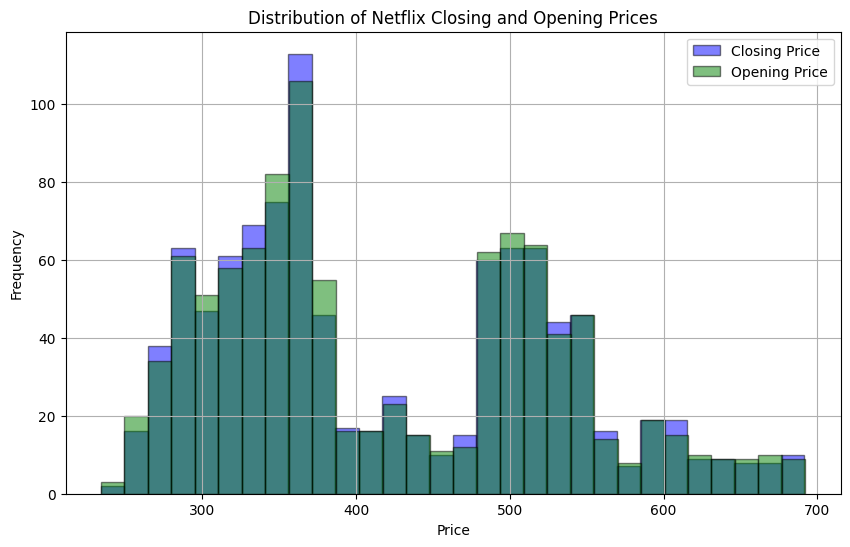

In [11]:
closing_price_stats = df['Close'].describe()
opening_price_stats = df['Open'].describe()

# Print basic statistics
print("Basic Statistics of Closing Price:")
print(closing_price_stats)
print("\nBasic Statistics of Opening Price:")
print(opening_price_stats)

# Create a histogram with both closing and opening prices
plt.figure(figsize=(10, 6))

plt.hist(df['Close'], bins=30, color='blue', alpha=0.5, label='Closing Price', edgecolor='black')
plt.hist(df['Open'], bins=30, color='green', alpha=0.5, label='Opening Price', edgecolor='black')

plt.title('Distribution of Netflix Closing and Opening Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid()

plt.show()

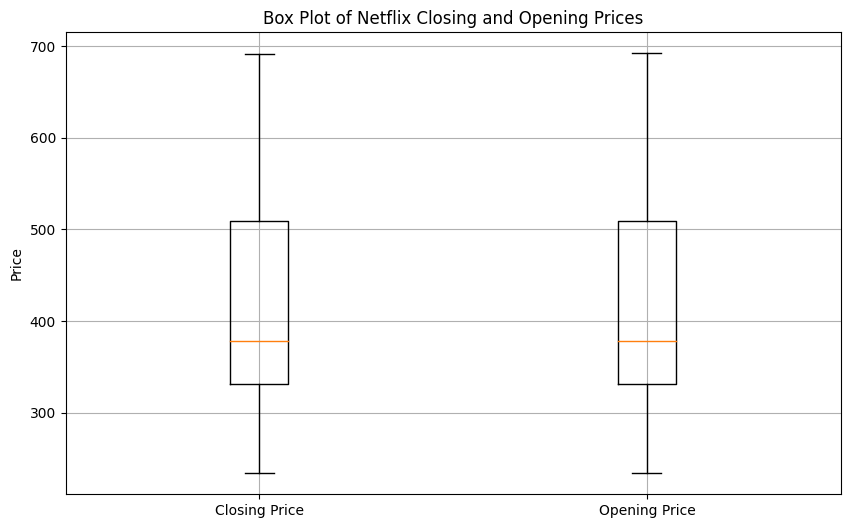

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Close'], df['Open']], labels=['Closing Price', 'Opening Price'])
plt.title('Box Plot of Netflix Closing and Opening Prices')
plt.ylabel('Price')
plt.grid()
plt.show()


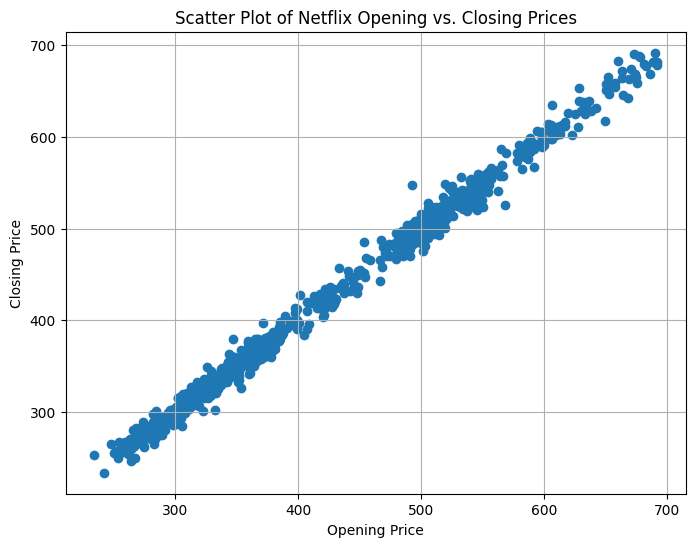

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Open'], df['Close'])
plt.title('Scatter Plot of Netflix Opening vs. Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [14]:
train, test = train_test_split(df, test_size = 0.2)

In [15]:
test_pred = test.copy()

In [16]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [17]:
y_train = train['Close'].values
y_test = test['Close'].values

In [18]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model_lnr.predict(x_test)

In [20]:
result = model_lnr.predict([[260.000000, 270.899994, 240.029999, 11896100]])
print(result)

[252.91247977]


In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 21.647
RMSE 4.653
MAE 3.16
MAPE 0.008
R2 Score :  0.998
